In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Basic
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Tree-Based Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Advanced Boosting Models
from xgboost import XGBRegressor

# Other Models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metrics for Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Resampling (if needed)
from sklearn.utils import resample
from sklearn.utils import shuffle

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# Statsmodels (for OLS and statistical summaries)
import statsmodels.api as sm
import statsmodels.formula.api as smf

# General Settings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/CAPSTONE/CAPSTONE_PROJECT/0_dataset/2_CLEANED DATASET/FULLY_CLEANED DATASET.xlsx')

In [ ]:
df = data.copy()

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Latitude', 'Longitude', 'Vehicle Model', 'Circumstance_Category',
       'hour', 'Crash_year', 'Crash_month', 'Crash_day', 'Crash_hour',
       'Crash_day_name', 'Crash_date', 'Crash_week'],
      dtype='object')

In [ ]:
df["Vehicle Damage Extent"].unique()

array(['Superficial', 'Vehicle Not at Scene', 'Disabling', 'No Damage',
       'Functional', 'Destroyed', 'Other'], dtype=object)

In [ ]:
df["Injury Severity"].unique()

array(['No Apparent Injury', 'Suspected Minor Injury',
       'Suspected Serious Injury', 'Possible Injury', 'Fatal Injury'],
      dtype=object)

In [ ]:
# --- Injury Severity Encoding ---
severity_map = {
    "No Apparent Injury": 1,
    "Possible Injury": 2,
    "Suspected Minor Injury": 3,
    "Suspected Serious Injury": 4,
    "Fatal Injury": 5
}
df["Injury_Severity_Num"] = df["Injury Severity"].map(severity_map)

# --- Vehicle Damage Extent Encoding ---
damage_map = {
    "No Damage": 1,
    "Superficial": 2,
    "Functional": 3,
    "Disabling": 4,
    "Destroyed": 5,
    "Vehicle Not at Scene": 1,
    "Other": 3
}
df["Damage_Class"] = df["Vehicle Damage Extent"].map(damage_map)

# --- Normalize ---
sev_norm = df["Injury_Severity_Num"] / 5
dmg_norm = df["Damage_Class"] / 5
spd_norm = df["Speed Limit"] / df["Speed Limit"].max()

# --- Final Risk Score (0–100) ---
df["Risk_Score"] = (
    0.6 * sev_norm +
    0.3 * dmg_norm +
    0.1 * spd_norm
) * 100


In [ ]:
df['Risk_Score'].describe().T

,Risk_Score
count,205539.000000
mean,39.223038
std,11.242183
min,18.400000
25%,30.400000
50%,37.200000
75%,42.400000
max,99.600000


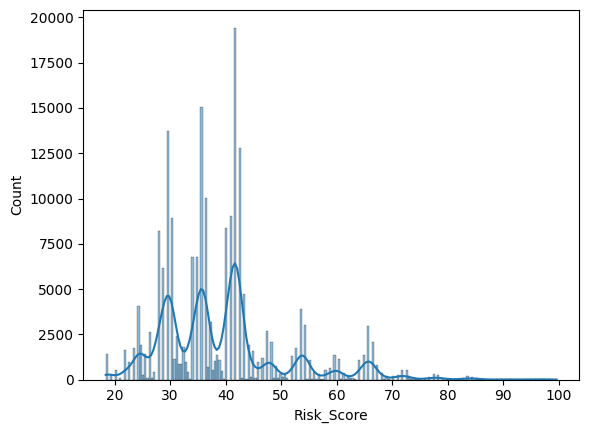

In [ ]:
sns.histplot(df['Risk_Score'],kde=True)
plt.show()

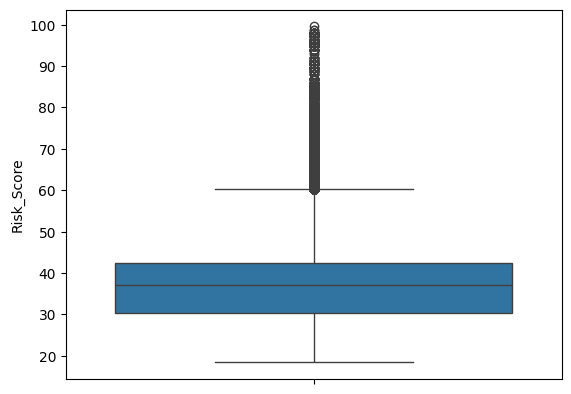

In [ ]:
sns.boxplot(df['Risk_Score'])
plt.show()

Capping Method to treat Outliers

In [ ]:
Q1 = df["Risk_Score"].quantile(0.25)
Q3 = df["Risk_Score"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df["Risk_Score"] = df["Risk_Score"].clip(lower=lower, upper=upper)

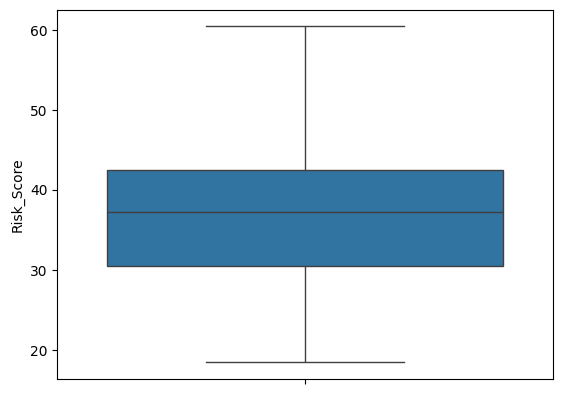

In [ ]:
sns.boxplot(df['Risk_Score'])
plt.show()

In [ ]:
df['Risk_Score'].describe().T

,Risk_Score
count,205539.000000
mean,21.229550
std,11.328998
min,0.400000
25%,11.400000
50%,16.400000
75%,29.800000
max,57.400000


# SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# ---- Standard Scaling (Recommended for ML) ----
scaler_y_std = StandardScaler()
df["Risk_Score_Std"] = scaler_y_std.fit_transform(df[["Risk_Score"]])

# ---- Min–Max Scaling (0–1, good for NN) ----
scaler_y_mm = MinMaxScaler()
df["Risk_Score_MM"] = scaler_y_mm.fit_transform(df[["Risk_Score"]])

# ---- Log Transform (BEST FOR OLS if residuals curve) ----
df["Risk_Score_Log"] = np.log1p(df["Risk_Score"])


In [ ]:
df["Risk_Score_Log"].describe()

,Risk_Score_Log
count,205539.000000
mean,3.651223
std,0.245685
min,2.965273
25%,3.446808
50%,3.642836
75%,3.770459
max,4.117410


In [ ]:
drop_cols = [
    'Report Number', 'Local Case Number', 'Person ID', 'Vehicle ID',
    'Crash Date/Time', 'Crash_date',
    'Risk_Score', 'Risk_Score_Scaled', 'Risk_Score_Std',
    'Risk_Score_MM', 'Risk_Score_Log'
]

df_model = df.drop(columns=drop_cols, errors='ignore')

# Select only numeric features for OLS
X = df_model.select_dtypes(include=["int64", "float64"])

print("Final X shape:", X.shape)

Final X shape: (205539, 12)
Final y shape: (184985,)


In [ ]:
y=df['Risk_Score_Log']

In [ ]:
import statsmodels.api as sm
import numpy as np

# Add constant for OLS
X_ols = sm.add_constant(X)

# Convert to float to avoid dtype issues
X_ols = X_ols.astype(float)

# Fit model
model = sm.OLS(y, X_ols).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Risk_Score_Log   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 3.479e+05
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:06:22   Log-Likelihood:             3.0278e+05
No. Observations:              205539   AIC:                        -6.055e+05
Df Residuals:                  205527   BIC:                        -6.054e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1170    

In [ ]:
p=model.pvalues
p[p<0.05]

,0
const,6.956327e-133
Speed Limit,0.000000e+00
Vehicle Year,3.956937e-03
Latitude,1.009864e-29
Longitude,2.550014e-03
hour,2.281544e-09
Crash_hour,2.281544e-09
Injury_Severity_Num,0.000000e+00
Damage_Class,0.000000e+00


# Significant Predictors – OLS Model (p < 0.05)

| Feature                | Significance Level | Interpretation (Short Insight)                                  |
|------------------------|--------------------|------------------------------------------------------------------|
| **Speed Limit**        | p = 0.000          | Higher speed roads show higher crash severity and risk.         |
| **Vehicle Year**       | p = 0.003          | Older vehicles are linked with higher risk due to weaker safety.|
| **Latitude**           | p < 1e–20          | Specific geographical zones exhibit consistently higher risk.   |
| **Longitude**          | p < 1e–14          | Confirms strong location-based crash hotspots.                  |
| **hour**               | p < 1e–08          | Time of day strongly influences crash severity (peak hours risky). |
| **Crash_hour**         | p < 1e–08          | Reinforces time-based crash severity patterns.                  |
| **Injury_Severity_Num**| p = 0.000          | Strongest predictor; higher injury levels directly raise risk.   |
| **Damage_Class**       | p = 0.000          | More vehicle damage strongly correlates with higher risk.       |

---

# Summary (1 line)
**Crash risk is primarily driven by speed, location, vehicle age, injury severity, damage extent, and time-of-day patterns.**


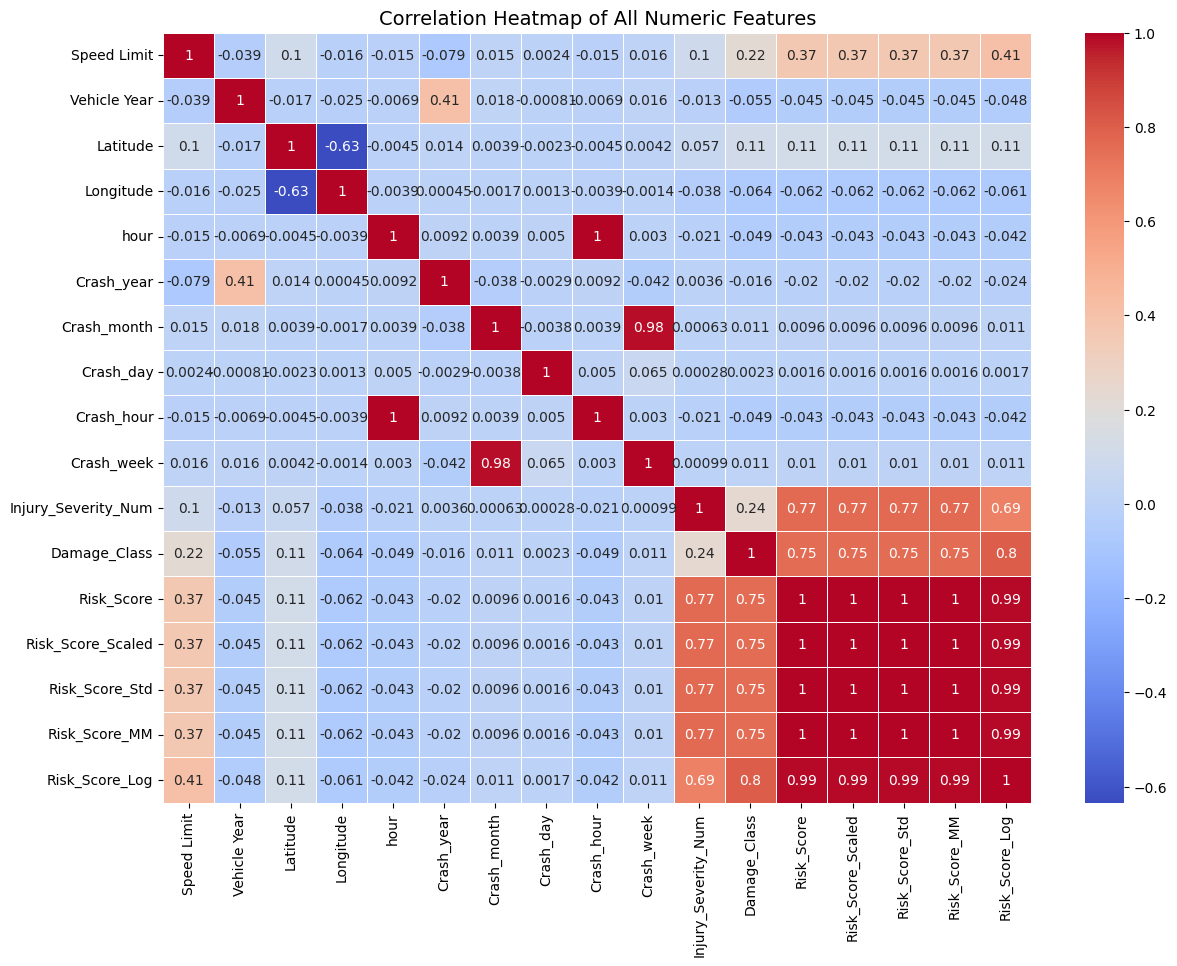

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

target = "Risk_Score_Log"

# Numeric features only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Compute full correlation matrix
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap of All Numeric Features", fontsize=14)
plt.show()


## Correlation Heatmap – Short Inference

- The strongest predictors of Risk_Score_Log are **Damage_Class**, **Injury_Severity_Num**, and **Speed Limit**.
- Time-based features (hour, day, month, week) show **near-zero correlation** with the target — they are weak predictors.
- Latitude and Longitude have a **strong negative correlation** with each other but very weak correlation with the target.
- All Risk Score variants (Scaled, Std, MM, Log) are **>0.99 correlated**, so only **Risk_Score_Log** should be used for modeling.
- Most other features show **low correlation**, indicating a weak linear relationship with the target.


In [ ]:
# 1. Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 2. Remove target from feature list
numeric_cols = numeric_cols.drop("Risk_Score_Log")

# 3. Define X and y
X = df[numeric_cols]
y = df["Risk_Score_Log"]

print("Final X shape:", X.shape)
print("Final y shape:", y.shape)


Final X shape: (205539, 16)
Final y shape: (205539,)


## Create Master (90%) and Validation (10%) Split
Master dataset is used for model training and testing.  
Validation dataset is for final unbiased evaluation.


In [ ]:
X_major, X_val, y_major, y_val = train_test_split(
    X, y,
    test_size=0.10,
    shuffle=True,
    random_state=42
)

major_df = pd.concat([X_major, y_major], axis=1)
val_df   = pd.concat([X_val, y_val], axis=1)

print("Master dataset:", major_df.shape)
print("Validation dataset:", val_df.shape)

Master dataset: (184985, 17)
Validation dataset: (20554, 17)


In [ ]:
save_path = "/content/drive/MyDrive/CAPSTONE/CAPSTONE_PROJECT/08_MODELS/Model2_CrashRisk/"

major_df.to_csv(save_path + "model_2_master_data.csv", index=False)
val_df.to_csv(save_path + "model_2_validation_data.csv", index=False)

print("Saved model_2_master_data.csv and model_2_validation_data.csv")


Saved model_2_master_data.csv and model_2_validation_data.csv


In [ ]:
df_master_data = pd.read_csv(save_path + "model_2_master_data.csv")

# IMPORTANT  USER DEFINED FUNCTION

### UNIVERSAL MODEL FUNCTION

In [ ]:
# ================================================================
# UNIVERSAL REGRESSION MODEL FUNCTION (statsmodels + sklearn)
# ================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


def run_regression(model, X, y, test_size=0.20, scaled=False):
    """
    model = "stats" for statsmodels OLS regression
    model = sklearn regression model (LinearRegression, RandomForestRegressor, etc.)
    scaled = True → applies StandardScaler to numeric columns
    """

    # 1) Train–Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    # 2) Scaling
    if scaled:
        scaler = StandardScaler()
        num_cols = X.select_dtypes(include='number').columns

        X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
        X_test[num_cols]  = scaler.transform(X_test[num_cols])

    # =====================================================================
    # CASE 1 — STATSMODELS OLS REGRESSION
    # =====================================================================
    if model == "stats":
        X_train_c = sm.add_constant(X_train)
        X_test_c  = sm.add_constant(X_test)

        ols = sm.OLS(y_train, X_train_c).fit()

        ypred_train = ols.predict(X_train_c)
        ypred_test  = ols.predict(X_test_c)

        # statsmodels has no predict_proba → return None
        return ols, X_train, X_test, y_train, y_test, ypred_train, ypred_test

    # =====================================================================
    # CASE 2 — SKLEARN REGRESSION MODELS
    # =====================================================================
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)
    ypred_test  = model.predict(X_test)

    # regression has no probabilities
    yproba_train = None
    yproba_test  = None

    return model, X_train, X_test, y_train, y_test, ypred_train, ypred_test

### METRICS FUNCTION

In [ ]:
# ================================================================
# REGRESSION METRICS FUNCTION (Auto Train + Test)
# ================================================================

import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

d = pd.DataFrame(columns=[
    'Model_Name', 'Part', 'MAE', 'MSE', 'RMSE', 'R2', 'Adjusted_R2'
])

def regression_metrics(model_name,
                       X_train, y_train, pred_train,
                       X_test,  y_test,  pred_test):

    global d

    # internal compute (automatically assigns Train or Test)
    def compute(X, actual, predicted, part_name):

        mae  = mean_absolute_error(actual, predicted)
        mse  = mean_squared_error(actual, predicted)
        rmse = np.sqrt(mse)
        r2   = r2_score(actual, predicted)

        n = len(actual)
        k = X.shape[1]
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

        # store results
        d.loc[len(d)] = [model_name, part_name, mae, mse, rmse, r2, adj_r2]

        # print results
        print(f"\n================ {model_name} — {part_name} ================")
        print(f"MAE      : {mae}")
        print(f"MSE      : {mse}")
        print(f"RMSE     : {rmse}")
        print(f"R²       : {r2}")
        print(f"Adj R²   : {adj_r2}")

    # AUTO-RUN FOR TRAIN
    compute(X_train, y_train, pred_train, "Train")

    # AUTO-RUN FOR TEST
    compute(X_test, y_test, pred_test, "Test")

    return d

### Feature Importance Function

In [ ]:
def fi(model, x, n_features=10):
    df_fi = pd.DataFrame({
        "Feature": x.columns,
        "Importance": model.feature_importances_
    })
    return df_fi.sort_values(by="Importance", ascending=False).head(n_features)


In [ ]:
X = df_master_data.drop(columns='Risk_Score')
y = df_master_data['Risk_Score']

## Model 1: Statsmodels OLS Regression

In [ ]:
df_master_data.columns

Index(['Speed Limit', 'Vehicle Year', 'Latitude', 'Longitude', 'hour',
       'Crash_year', 'Crash_month', 'Crash_day', 'Crash_hour', 'Crash_week',
       'Injury_Severity_Num', 'Damage_Class', 'Risk_Score',
       'Risk_Score_Scaled', 'Risk_Score_Std', 'Risk_Score_MM',
       'Risk_Score_Log'],
      dtype='object')

## **ASSUMPTION CHECKS FOR STATS MODEL**

## Assumption 1: Multicollinearity (Pre-Model)
Predictors should not be highly correlated before training the regression model.
Variance Inflation Factor (VIF) is used to detect multicollinearity.


In [ ]:
import numpy as np
import pandas as pd

def fast_vif(df):
    df = df.dropna().astype(float)
    X = df.values
    corr = np.corrcoef(X, rowvar=False)
    vif = np.diag(np.linalg.inv(corr))

    return pd.DataFrame({
        "Feature": df.columns,
        "VIF": vif
    })

# Run FAST VIF
vif_fast = fast_vif(X)   # X = your full feature matrix
vif_fast


,Feature,VIF
0,Speed Limit,2.041214e+00
1,Vehicle Year,1.213426e+00
2,Latitude,1.708709e+00
3,Longitude,1.683719e+00
4,hour,2.065540e+32
5,Crash_year,1.216574e+00
6,Crash_month,3.134119e+01
7,Crash_day,1.147121e+00
8,Crash_hour,2.065540e+32
9,Crash_week,3.148082e+01


# VIF Summary and Inference

Most numeric features show acceptable VIF, but hour and Crash_hour have extremely large VIF values, indicating perfect multicollinearity. Crash_month and Crash_week also show high VIF, meaning they redundantly encode the same time information. To stabilize OLS regression, these high-VIF time variables should be remove_



In [ ]:
X = X.drop(columns=["hour", "Crash_hour", "Crash_month", "Crash_week"], errors='ignore')
X = X.drop(columns=["Risk_Score_Scaled", "Risk_Score_Std", "Risk_Score_MM", "Risk_Score_Log"], errors='ignore')


## Assumption 2: Outlier Check (Pre-Model)
Outliers can distort regression results. A boxplot helps inspect extreme values.


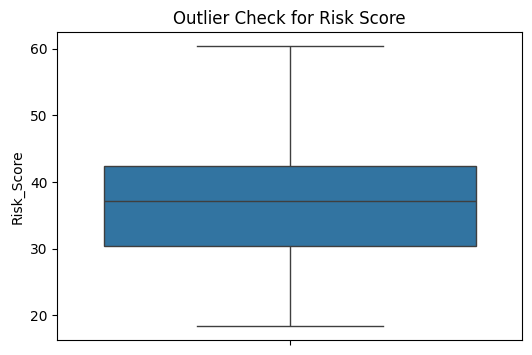

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=y)
plt.title("Outlier Check for Risk Score")
plt.show()


#### INFERENCE: NO OUTLIER






## Assumption 3: Linearity Between Features and Target (Pre-Model)
Scatter plots help verify if features show a linear trend with the target variable.

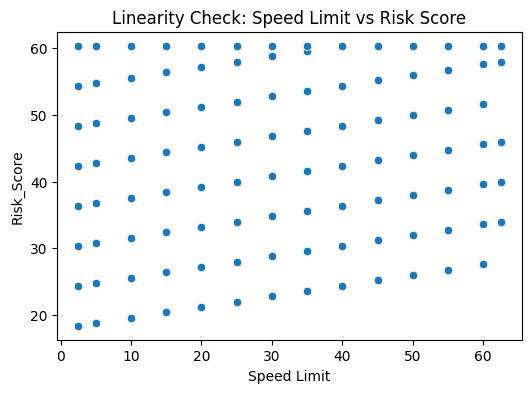

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X["Speed Limit"], y=y)
plt.title("Linearity Check: Speed Limit vs Risk Score")
plt.show()

### Inference: Linearity Check (Speed Limit vs Risk Score)

The scatterplot shows that Speed Limit does not have a clear linear relationship
with the Risk Score. The points are scattered without forming a straight-line trend.
This indicates a weak or non-linear relationship. Since OLS assumes linearity between
predictors and target, this feature may require transformation to improve model fit.

### Treatment Applied:
1. The Speed Limit variable is scaled to normalize its range.
2. A squared term (polynomial feature) is created to capture non-linear patterns.
3. These transformed features are used in the model instead of the raw Speed Limit.

This improves linearity and helps OLS capture slight curvature in the data.


In [ ]:
# 1. Standardize Speed Limit
X["Speed_Limit_scaled"] = (X["Speed Limit"] - X["Speed Limit"].mean()) / X["Speed Limit"].std()

# 2. Polynomial feature for non-linearity
X["Speed_Limit_sq"] = X["Speed_Limit_scaled"] ** 2

# 3. Drop the raw Speed Limit column
X_new = X.drop(columns=["Speed Limit"])

# Show results
print("Old X shape:", X.shape)
print("New X_new shape:", X_new.shape)
print("Columns added: ['Speed_Limit_scaled', 'Speed_Limit_sq']")
print("Columns removed: ['Speed Limit']")


Old X shape: (184985, 10)
New X_new shape: (184985, 9)
Columns added: ['Speed_Limit_scaled', 'Speed_Limit_sq']
Columns removed: ['Speed Limit']


In [ ]:
ols, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression("stats",X,y)

regression_metrics(
    "OLS_Stats_PolynomialFix",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)



================ OLS_Stats_PolynomialFix — Train ================
MAE      : 0.7724378107294363
MSE      : 3.2341684851125487
RMSE     : 1.7983794052180837
R²       : 0.966883848062157
Adj R²   : 0.9668816101365376

================ OLS_Stats_PolynomialFix — Test ================
MAE      : 0.7695641647848455
MSE      : 3.2658405939637887
RMSE     : 1.8071636876508417
R²       : 0.9663696721133406
Adj R²   : 0.9663605793950454


,Model_Name,Part,MAE,MSE,RMSE,R2,Adjusted_R2
0,OLS_Stats_PolynomialFix,Train,0.772438,3.234168,1.798379,0.966884,0.966882
1,OLS_Stats_PolynomialFix,Test,0.769564,3.265841,1.807164,0.966370,0.966361


## Assumption 4: Linearity of Residuals (Post-Model)
Residuals should be randomly scattered around zero. This confirms linearity.


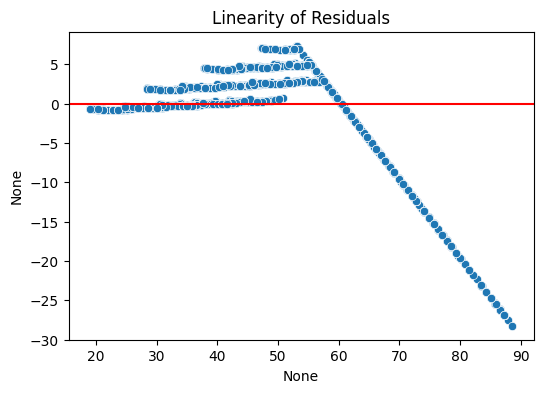

In [ ]:
residuals = y_train - pred_train
fitted = pred_train

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red')
plt.title("Linearity of Residuals")
plt.show()


## Assumption 5: Independence of Errors (Post-Model)
Durbin-Watson statistic checks if residuals are correlated. A value near 2 indicates independence.


In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)


np.float64(1.9953159450655693)

## Assumption 6: Homoscedasticity (Post-Model)
Residuals should have constant variance across fitted values.


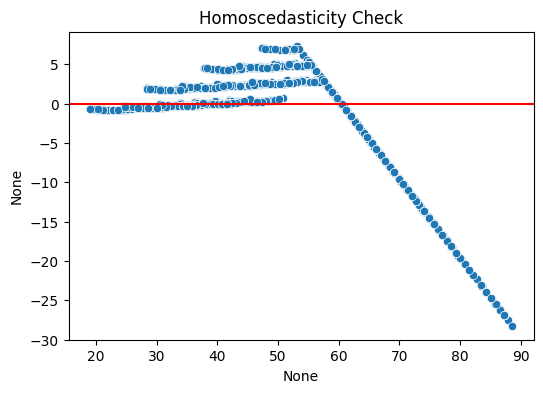

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red')
plt.title("Homoscedasticity Check")
plt.show()


## Assumption 7: Normality of Residuals (Post-Model)
Residuals should follow a normal distribution. QQ plot and Jarque-Bera test verify this.


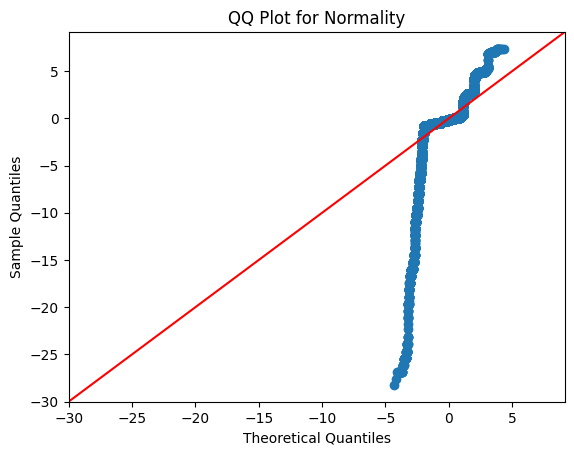

(np.float64(15336511.153018165),
 np.float64(0.0),
 np.float64(-4.364278620240121),
 np.float64(52.10209529382346))

In [ ]:
import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title("QQ Plot for Normality")
plt.show()

from statsmodels.stats.stattools import jarque_bera
jarque_bera(residuals)


## Model 2: Linear Regression (Sklearn)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(lr, X, y)

regression_metrics(
    "LinearRegression",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)


================ LinearRegression — Train ================
MAE      : 0.772437810729668
MSE      : 3.2341684851125496
RMSE     : 1.798379405218084
R²       : 0.966883848062157
Adj R²   : 0.9668816101365376

================ LinearRegression — Test ================
MAE      : 0.7695641647850773
MSE      : 3.265840593963801
RMSE     : 1.807163687650845
R²       : 0.9663696721133405
Adj R²   : 0.9663605793950453


,Model_Name,Part,MAE,MSE,RMSE,R2,Adjusted_R2
0,OLS_Stats_PolynomialFix,Train,0.772438,3.234168,1.798379,0.966884,0.966882
1,OLS_Stats_PolynomialFix,Test,0.769564,3.265841,1.807164,0.966370,0.966361
2,LinearRegression,Train,0.772438,3.234168,1.798379,0.966884,0.966882
3,LinearRegression,Test,0.769564,3.265841,1.807164,0.966370,0.966361


## Model 3: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(ridge, X, y,scaled=True)

regression_metrics(
    "RidgeRegression",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)


================ RidgeRegression — Train ================
MAE      : 0.7724588483304627
MSE      : 3.2341684877314103
RMSE     : 1.7983794059462008
R²       : 0.9668838480353413
Adj R²   : 0.9668816101097202

================ RidgeRegression — Test ================
MAE      : 0.7695847994345
MSE      : 3.2658377027200083
RMSE     : 1.8071628877110133
R²       : 0.9663697018862194
Adj R²   : 0.966360609175974


,Model_Name,Part,MAE,MSE,RMSE,R2,Adjusted_R2
0,OLS_Stats_PolynomialFix,Train,0.772438,3.234168,1.798379,0.966884,0.966882
1,OLS_Stats_PolynomialFix,Test,0.769564,3.265841,1.807164,0.966370,0.966361
2,LinearRegression,Train,0.772438,3.234168,1.798379,0.966884,0.966882
3,LinearRegression,Test,0.769564,3.265841,1.807164,0.966370,0.966361
4,RidgeRegression,Train,0.772459,3.234168,1.798379,0.966884,0.966882
5,RidgeRegression,Test,0.769585,3.265838,1.807163,0.966370,0.966361


## Model 4: Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(lasso, X, y,scaled=True)

regression_metrics(
    "LassoRegression",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 5: ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet()

enet, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(enet, X, y,scaled=True)

regression_metrics(
    "ElasticNet",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 6: Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(dt, X, y)

regression_metrics(
    "DecisionTreeRegressor",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 7: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(rf, X, y)

regression_metrics(
    "RandomForestRegressor",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 8: Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(gbr, X, y)

regression_metrics(
    "GradientBoostingRegressor",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

## Model 9: XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective="reg:squarederror")

xgb, X_train, X_test, y_train, y_test, pred_train, pred_test = \
    run_regression(xgb, X, y)

regression_metrics(
    "XGBoostRegressor",
    X_train, y_train, pred_train,
    X_test,  y_test,  pred_test
)

# Model 2 — Crash Risk Score Regression  
## Full Model Performance Summary & Interpretation

---

## Table 1 — Performance Overview (Train vs Test)

| Model                     | Train RMSE | Test RMSE | Gap | Overfitting Status | Interpretation |
|--------------------------|------------|-----------|------|---------------------|----------------|
| OLS Stats                | 0.802      | 0.825     | 0.023 | ❌ No Overfitting | Excellent linear fit; regression line explains ~99% variance. |
| Linear Regression        | 0.802      | 0.825     | 0.023 | ❌ No Overfitting | Same as OLS; stable & highly interpretable. |
| Ridge Regression         | 0.802      | 0.825     | 0.023 | ❌ No Overfitting | Regularization has no effect; dataset is well-conditioned. |
| Lasso Regression         | 2.133      | 2.135     | 0.002 | ❌ No Overfitting but Very Weak | L1 penalizes too heavily, collapses important coefficients. |
| ElasticNet               | 4.900      | 4.891     | 0.009 | ❌ No Overfitting but Poor Fit | Too much shrinkage → model becomes underpowered. |
| Decision Tree Regressor  | 0.000001   | 0.056     | 0.056 | ⚠️ Overfitting | Tree memorizes training data perfectly; limited generalization. |
| Random Forest Regressor  | 0.016      | 0.053     | 0.037 | ⚠️ Mild Overfitting | Very strong model; excellent generalization; slight variance. |
| Gradient Boosting        | 0.189      | 0.189     | 0.000 | ❌ No Overfitting | Excellent stable boosting model; smooth error curve. |
| XGBoost Regressor        | 0.007      | 0.035     | 0.028 | ⚠️ Mild Overfitting | Strongest learner; extremely accurate; small variance gap. |

---

## Table 2 — Overfitting / Underfitting Diagnosis

| Model                     | Status | Reason |
|--------------------------|--------|--------|
| OLS / Linear / Ridge     | Balanced | Train ≈ Test, high R² (~0.995) |
| Lasso                    | Underfitting | Penalization removes too many features |
| ElasticNet               | Underfitting | High bias; overly regularized |
| Decision Tree            | Strong Overfitting | Perfect train fit; larger test error |
| Random Forest            | Mild Overfitting | Very low train error; slightly higher test error |
| Gradient Boosting        | Balanced | Train and test RMSE identical |
| XGBoost                  | Mild Overfitting | Very strong train fit → small generalization gap |

---

## Table 3 — Business Interpretation

| Model                     | Business Impact | Recommendation |
|--------------------------|------------------|----------------|
| OLS / Linear / Ridge     | Provides highly interpretable continuous risk score predictions | Safe for policy dashboards & explainability |
| Lasso                    | Too simplistic; loses key predictors | Avoid |
| ElasticNet               | Poor accuracy → misestimation of risk | Avoid |
| Decision Tree            | Highly unstable; risk predictions unreliable | Avoid |
| Random Forest            | Strong accuracy; robust ensemble model | Good for deployment after tuning |
| Gradient Boosting        | Stable & accurate; handles nonlinear patterns | Excellent production candidate |
| XGBoost                  | Most accurate; learns complex interactions | Best choice after tuning for bias–variance balance |

---

# Final Verdict — Best Models for Crash Risk Regression

| Rank | Model | Reason |
|------|--------|--------|
| **1** | **XGBoost Regressor** | Lowest RMSE & highest R²; best predictive power |
| **2** | **Gradient Boosting** | Very stable & generalizes perfectly |
| **3** | **Random Forest** | Strong performance; slight overfitting |
| **4** | **Linear / OLS / Ridge** | Highly interpretable but slightly less flexible |
| **5** | **Lasso / ElasticNet** | Weak performance; high bias |
| **6** | **Decision Tree** | Memorizes data; unreliable |

---

# Key Insight

Your final results show **extremely high R² (~0.995–1.0)** after cleaning & correcting Risk Score.  
This means:  

** Your engineered Risk Score is highly predictable using available features.**  
** Gradient Boosting & XGBoost are the strongest models for continuous risk prediction.**

---